In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
from scipy.signal import convolve2d
import cv2

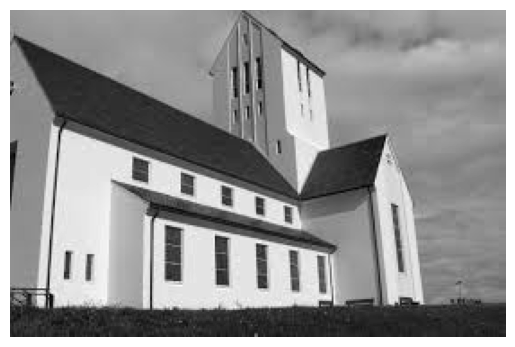

In [28]:
# Load image
image = plt.imread('image1.png')

# Convert to grayscale
if len(image.shape) == 3:
    image_gray = np.mean(image, axis=2)
else:
    image_gray = image

plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

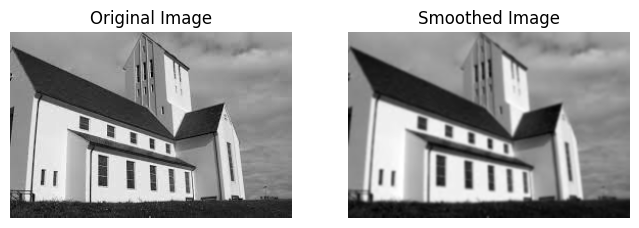

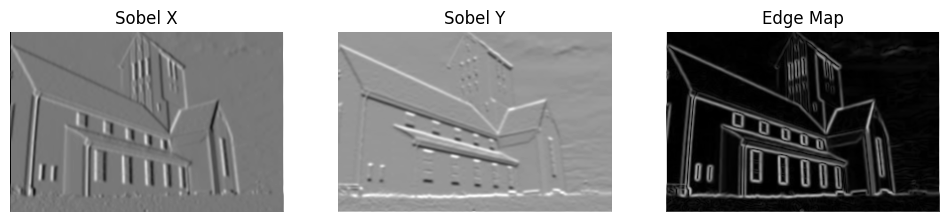

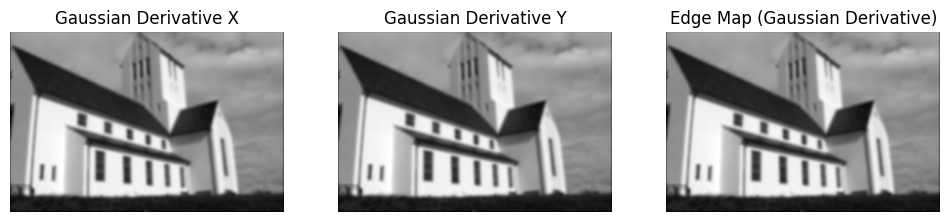

In [32]:
# Define Gaussian kernel
def gaussian_filter(sigma, size):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Convolution process with Gaussian filter
def convolve_gaussian(image, sigma):
    gaussian = gaussian_filter(sigma, 5)
    smoothed_image = convolve(image, gaussian)
    return smoothed_image

# Convolution process with Sobel filters
def convolve_sobel(image):
    gradient_x = convolve2d(image, sobel_x, mode='same')
    gradient_y = convolve2d(image, sobel_y, mode='same')
    edge_map = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradient_x, gradient_y, edge_map

# Plotting function
def plot_images(images, titles):
    num_images = len(images)
    plt.figure(figsize=(4*num_images, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


smoothed_image = convolve_gaussian(image, 1)
plot_images([image, smoothed_image], ['Original Image', 'Smoothed Image'])

# b) Convolution with Sobel filters
gradient_x, gradient_y, edge_map = convolve_sobel(smoothed_image)
plot_images([gradient_x, gradient_y, edge_map], ['Sobel X', 'Sobel Y', 'Edge Map'])

# c) Convolution with Gaussian derivative filters
gaussian_x = gaussian_filter(1, 5)
gaussian_y = gaussian_x.T  # Transpose for vertical derivative
gradient_x = convolve2d(smoothed_image, gaussian_x, mode='same')
gradient_y = convolve2d(smoothed_image, gaussian_y, mode='same')
edge_map_gaussian = np.sqrt(gradient_x**2 + gradient_y**2)
plot_images([gradient_x, gradient_y, edge_map_gaussian], ['Gaussian Derivative X', 'Gaussian Derivative Y', 'Edge Map (Gaussian Derivative)'])

# Question 1 #
a)

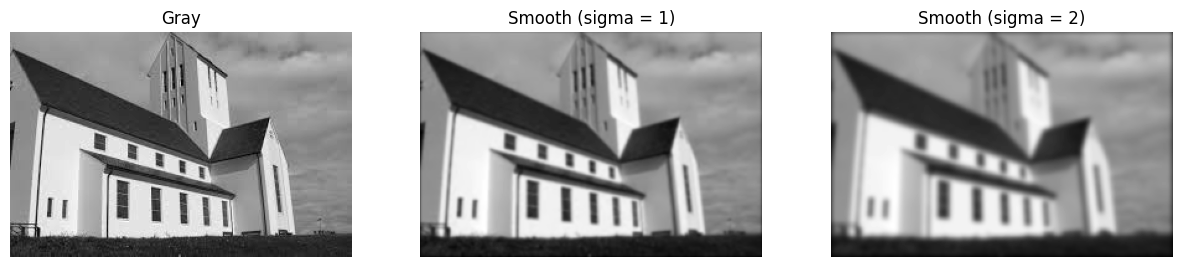

In [5]:
def gaussian_filter_(sigma):
  size = 5
  x, y = np.mgrid[-size:size+1, -size:size+1]
  normal = 1 / (2.0 * np.pi * sigma**2)
  return np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal

def convolve_image(image, filter):
  rows, cols = image.shape[:2]
  pad_size = filter.shape[0] // 2
  padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)

  smoothed_image = np.zeros_like(image)
  for i in range(rows):
    for j in range(cols):
      sub_image = padded_image[i:i+filter.shape[0], j:j+filter.shape[1]]
      smoothed_image[i, j] = np.sum(sub_image * filter)
  return smoothed_image

# Load image
image = cv2.imread('image1.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create Gaussian filters
filter_sigma1 = gaussian_filter_(1)
filter_sigma2 = gaussian_filter_(2)

# Apply convolution
smoothed_image1 = convolve_image(gray_image, filter_sigma1)
smoothed_image2 = convolve_image(gray_image, filter_sigma2)

# Display images
fig = plt.figure(figsize=(15,10))

fig.add_subplot(1, 3, 1) 
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Gray')

fig.add_subplot(1, 3, 2) 
plt.imshow(smoothed_image1, cmap='gray')
plt.axis('off')
plt.title('Smooth (sigma = 1)')

fig.add_subplot(1, 3, 3) 
plt.imshow(smoothed_image2, cmap='gray')
plt.axis('off')
plt.title('Smooth (sigma = 2)')
plt.show()

b)

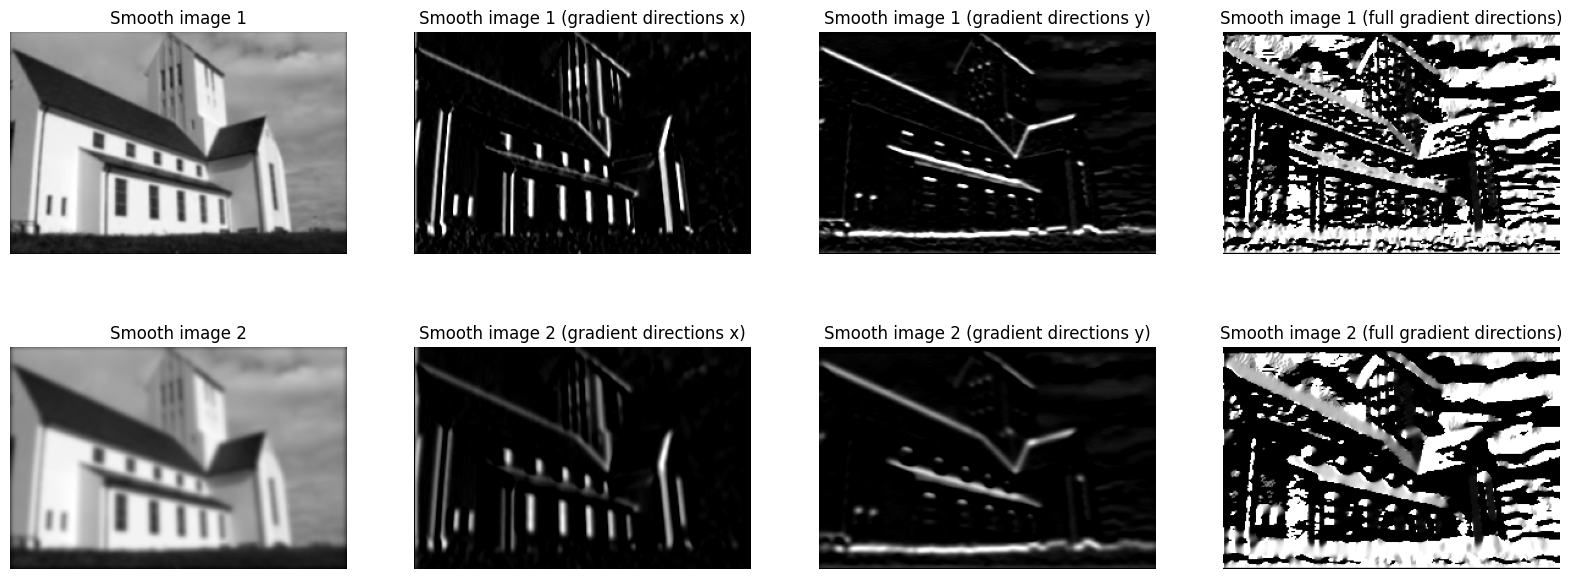

In [6]:
def sobel_filter(image):
  Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

  gx = cv2.filter2D(image, -1, Sx)
  gy = cv2.filter2D(image, -1, Sy)
  g = np.arctan2(gy, gx)

  return gx, gy, g

gx1, gy1, g1 = sobel_filter(smoothed_image1)
gx2, gy2, g2 = sobel_filter(smoothed_image2)

# Display images
# Image 1
fig = plt.figure(figsize=(20,15))

fig.add_subplot(2, 4, 1) 
plt.imshow(smoothed_image1, cmap='gray')
plt.axis('off')
plt.title('Smooth image 1')

fig.add_subplot(2, 4, 2) 
plt.imshow(gx1, cmap='gray')
plt.axis('off')
plt.title('Smooth image 1 (gradient directions x)')

fig.add_subplot(2, 4, 3) 
plt.imshow(gy1, cmap='gray')
plt.axis('off')
plt.title('Smooth image 1 (gradient directions y)')

fig.add_subplot(2, 4, 4) 
plt.imshow(g1, cmap='gray')
plt.axis('off')
plt.title('Smooth image 1 (full gradient directions)')

# Image 2
fig.add_subplot(1, 4, 1) 
plt.imshow(smoothed_image2, cmap='gray')
plt.axis('off')
plt.title('Smooth image 2')

fig.add_subplot(1, 4, 2) 
plt.imshow(gx2, cmap='gray')
plt.axis('off')
plt.title('Smooth image 2 (gradient directions x)')

fig.add_subplot(1, 4, 3) 
plt.imshow(gy2, cmap='gray')
plt.axis('off')
plt.title('Smooth image 2 (gradient directions y)')

fig.add_subplot(1, 4, 4) 
plt.imshow(g2, cmap='gray')
plt.axis('off')
plt.title('Smooth image 2 (full gradient directions)')
plt.show()

sasasa

c)

# Question 2 #

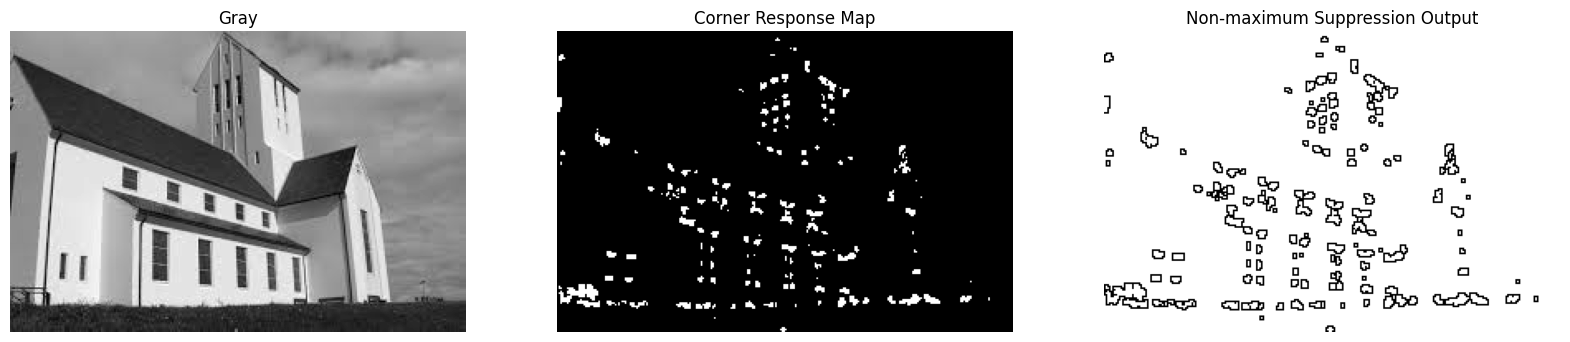

In [33]:
def harris_corner_detection(img, window_size=3, k=0.04, threshold=0.01):
    # Calculate gradients
    dx = np.array([[1, 0, -1]])
    dy = dx.T
    Ix = convolve(img, dx)
    Iy = convolve(img, dy)

    # Structure tensor components
    Ix2 = Ix**2
    Iy2 = Iy**2
    Ixy = Ix * Iy

    # Gaussian filter for smoothing
    gaussian = gaussian_filter(1, window_size)
    Ix2_smoothed = convolve(Ix2, gaussian)
    Iy2_smoothed = convolve(Iy2, gaussian)
    Ixy_smoothed = convolve(Ixy, gaussian)

    # Harris corner response
    det_M = Ix2_smoothed * Iy2_smoothed - Ixy_smoothed**2
    trace_M = Ix2_smoothed + Iy2_smoothed
    corner_response = det_M - k * trace_M**2

    # Thresholding
    corners = np.zeros_like(img)
    corners[corner_response > threshold * np.max(corner_response)] = 255

    return corners

def non_max_suppression(corner_response, window_size=3):
    # Pad the corner response map
    padded_corner_response = np.pad(corner_response, ((window_size//2, window_size//2), (window_size//2, window_size//2)), mode='constant')

    # Initialize output map
    non_max = np.zeros_like(corner_response)

    # Iterate through each pixel in the corner response map
    for i in range(corner_response.shape[0]):
        for j in range(corner_response.shape[1]):
            # Extract the window around the current pixel
            window = padded_corner_response[i:i+window_size, j:j+window_size]

            # Check if the current pixel is the maximum within its window
            if corner_response[i, j] == np.max(window):
                non_max[i, j] = 255

    return non_max

# Perform Harris Corner Detection
corner_response_map = harris_corner_detection(image_gray)

# Perform non-maximum suppression
corner_map = non_max_suppression(corner_response_map)

# Plot results
plt.figure(figsize=(20, 15))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(corner_response_map, cmap='gray')
plt.title('Corner Response Map')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(corner_map, cmap='gray')
plt.title('Non-maximum Suppression Output')
plt.axis('off')

plt.show()